# Forward Algorithm Hidden Markov Model
## Takao Oba

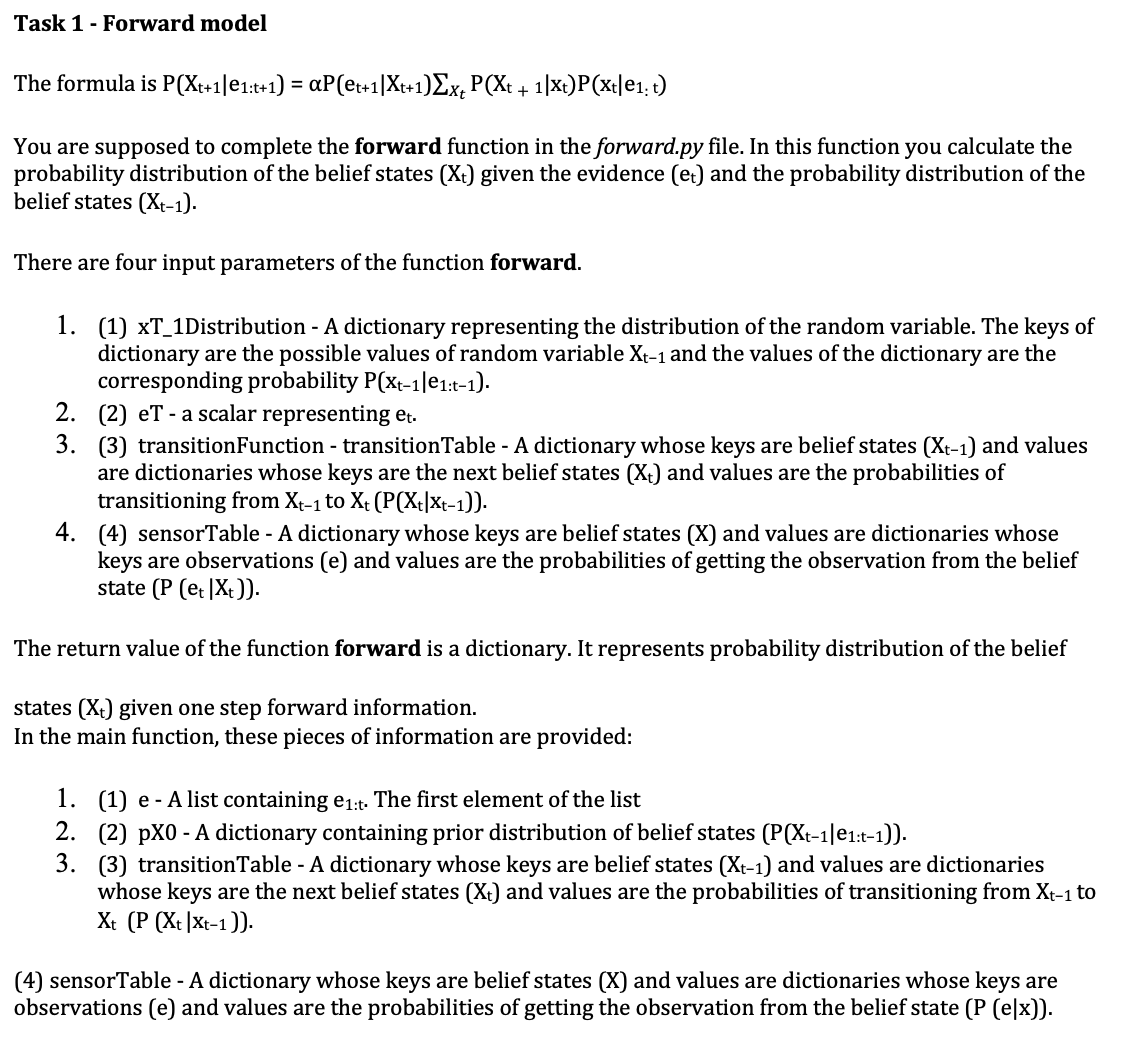

In [1]:
def expect(xDistribution, function):
    fxProduct=[px*function(x) for x, px in xDistribution.items()]
    expectation=sum(fxProduct)
    return expectation


def forward(xT_1Distribution, eT, transitionTable, sensorTable):
    
##################################################
#		Your code here
    
#     transition probabilities p(xt | xt-1) -- transitionTable 
#     emission probabilities p(yj | xi) --- sensorTable 
#     observed sequence y1:t --- eT  
#     prior probability a0(x0) -- xT_1Distribution 
    
    
    sumright = []
    
    # for loop that iterates through the possible states 
    for i in range(len(xT_1Distribution)):
        
        # obtaining the state for the current iteration
        tTableList = list(transitionTable.keys())[i]
        
        # using the expect function to get the posterior
        temp = lambda x: transitionTable[x][tTableList]
        posterior = expect(xT_1Distribution, temp)
        
        # since there is a dictionary in a dictionary for sensorTable, we deconstruct it
        # obtain the values of current iteration which is also a dictionary
        templist = list(sensorTable.values())[i]
        out = (templist.get(eT)*posterior)
        
        # generating a tuple where the first element is the state and out is the probability
        temptuple = tuple([tTableList, out])
        
        # appending it to list
        sumright.append(temptuple)
        
            
    
    
    ##### scaling the probabilities (alpha)
    
    # generating a temporary dictionary so that certain operations can be performed
    sumtemp = dict(sumright)
    
    # dividing each value by the total of the values to find respective probability
    total = sum(list(sumtemp.values()))
    outval = []
    for t in range(len(sumtemp)):
        tempkey = sumright[t][0]
        tempval = sumright[t][1]/total
        tupletemp = tuple([tempkey, tempval])
        
        # appending each temporary tuple to the new list
        outval.append(tupletemp)

    # transform the list into a dictionary
    outval = dict(outval)
    
    



################################################## 

    return outval

def main():
    
    pX0={0:0.3, 1:0.7}
    e=1
    transitionTable={0:{0:0.6, 1:0.4}, 1:{0:0.3, 1:0.7}}
    sensorTable={0:{0:0.6, 1:0.3, 2:0.1}, 1:{0:0, 1:0.5, 2:0.5}}
    
    xTDistribution=forward(pX0, e, transitionTable, sensorTable)
    print(xTDistribution)

if __name__=="__main__":
    main()

{0: 0.27725118483412325, 1: 0.7227488151658767}
